## BloomTech Data Science

**Note on Imports**
There have been some updates to the names of imports that will not match the names in the guided project. This is normal as pandas have updated the names and the current code has updated to match.
Here is an [Article](https://www.datacamp.com/tutorial/pandas-profiling-ydata-profiling-in-python-guide) about the changes.
---


# Decision Trees

- clean data with **outliers and missing values**
- use scikit-learn for **decision trees**
- get and interpret **feature importances** of a tree-based model
- understand why decision trees are useful to model

In [1]:
%%capture
#!pip install category_encoders==2.*
#pip install ydata_profiling==4.*

In [2]:
#from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline
#from category_encoders import OneHotEncoder, OrdinalEncoder
#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#from pandas_profiling import ProfileReport
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# pd.options.display.max_rows = 100

# Downloading the Tanzania Waterpump Dataset

Make sure  you only use the dataset that is available through the **DS** **Kaggle Competition**. DO NOT USE any other Tanzania waterpump datasets that you might find online.

There are two ways you can get the dataset. Make sure you have joined the competition first!:

1. You can download the dataset directly by accessing the challenge and the files through the Kaggle Competition URL on Canvas (make sure you have joined the competition!)

2. Use the Kaggle API using the code in the following cells. This article provides helpful information on how to fetch your Kaggle Dataset into Google Colab using the Kaggle API.

> https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

# Using Kaggle API to download dataset

In [3]:
# mounting your google drive on colab
#from google.colab import drive
#drive.mount('/content/gdrive')

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#change your working directory, if you want to or have already saved your kaggle dataset on google drive.
#%cd /content/gdrive/My Drive/Kaggle
# update it to your folder location on drive that contians the dataset and/or kaggle API token json file.

In [6]:
# Download your Kaggle Dataset, if you haven't already done so
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle" # providing the config path to kaggle.json
#!kaggle competitions download -c bloomtech-water-pump-challenge # downloading dataset by running the Kaggle API command

In [7]:
# Unzip your Kaggle dataset, if you haven't already done so.
# !unzip \*.zip  && rm *.zip

In [8]:
# List all files in your Kaggle folder on your google drive.
#!ls

In [9]:
import pandas as pd
train_features = pd.read_csv('C:/Users/ISHMO_CT/Downloads/bloomtech-water-pump-challenge/train_features.csv')
train_labels = pd.read_csv('C:/Users/ISHMO_CT/Downloads/bloomtech-water-pump-challenge/train_labels.csv')
test_features = pd.read_csv('C:/Users/ISHMO_CT/Downloads/bloomtech-water-pump-challenge/test_features.csv')

### Data - Option 2
If you're having trouble with getting the Kaggle data mounted in Google Drive, here's another option...

In [10]:
#DATAPATH = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Kaggle-Challenge/master/data/kaggle/"

In [11]:
#train_features = pd.read_csv(DATAPATH + 'train_features.csv')
#train_labels = pd.read_csv(DATAPATH + 'train_labels.csv')
#test_features = pd.read_csv(DATAPATH + 'test_features.csv')

# I. Wrangle Data


In [12]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
1,510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
3,47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
4,1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other


In [13]:
train_labels.head()

,id,status_group
0,454,functional
1,510,functional
2,14146,non functional
3,47410,non functional
4,1288,non functional


In [14]:
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,37098,0.0,2012-10-09,Rural Water Supply And Sanitat,0,DWE,31.985658,-3.596360,Kasela,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
1,14530,0.0,2012-11-03,Halmashauri Ya Manispa Tabora,0,Halmashauri ya manispa tabora,32.832815,-4.944937,Mbugani,0,...,never pay,milky,milky,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
2,62607,10.0,2013-02-25,Siter Fransis,1675,DWE,35.488289,-4.242048,Kwa Leosi,0,...,per bucket,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
3,46053,0.0,2011-08-13,Kkkt,0,KKKT,33.140828,-9.059386,Jangi,0,...,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump
4,47083,50.0,2013-02-08,Wateraid,1109,SEMA,34.217077,-4.430529,Mkima,0,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe


In [15]:
train = pd.merge(train_features, train_labels)
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
2,14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
3,47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
4,1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,68525,1000.0,2011-03-20,Dhv,327,DWE,36.367112,-8.774761,Kwa Mbayambaya,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
47516,11980,1000.0,2011-03-10,Danida,1743,DANID,34.531524,-9.769604,none,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
47517,35778,0.0,2011-03-13,Omar Ally,-13,Omar Ally,38.974416,-5.420823,Kwa Omar Ally,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
47518,49444,0.0,2012-10-31,Rwssp,0,WEDECO,34.316586,-3.107161,Muungano,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


### EDA

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47520 entries, 0 to 47519
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47520 non-null  int64  
 1   amount_tsh             47520 non-null  float64
 2   date_recorded          47520 non-null  object 
 3   funder                 44643 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              44631 non-null  object 
 6   longitude              47520 non-null  float64
 7   latitude               47520 non-null  float64
 8   wpt_name               47519 non-null  object 
 9   num_private            47520 non-null  int64  
 10  basin                  47520 non-null  object 
 11  subvillage             47224 non-null  object 
 12  region                 47520 non-null  object 
 13  region_code            47520 non-null  int64  
 14  district_code          47520 non-null  int64  
 15  lg

In [20]:
from ydata_profiling import ProfileReport

report = ProfileReport(train, minimal=True)

report.to_file("profile_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train = pd.merge(pd.read_csv('train_features.csv',na_values=[0, -2.000000e-08]),
                 pd.read_csv('train_labels.csv'))
X_test = pd.read_csv('test_features.csv', na_values=[0, -2.000000e-08])

def wrangle(df):

  # Set the index to 'id'
  df.set_index('id', inplace=True)

  # Drop Constant Column
  df.drop(columns='recorded_by', inplace=True)

  # Drop Duplicate Column
  #df.drop(columns=, inplace=True)

  # Drop High Cardinality Columns
  threshold = 100
  cols_to_drop = [col for col in df.select_dtypes('object') if df[col].nunique() > threshold]
  df.drop(columns=cols_to_drop, inplace=True)

  # Drop columns with high proportion of zeros
  df.drop(columns='num_private', inplace=True)

  return df

train = wrangle(train)
X_test = wrangle(test_features)


FileNotFoundError: [Errno 2] No such file or directory: 'train_features.csv'

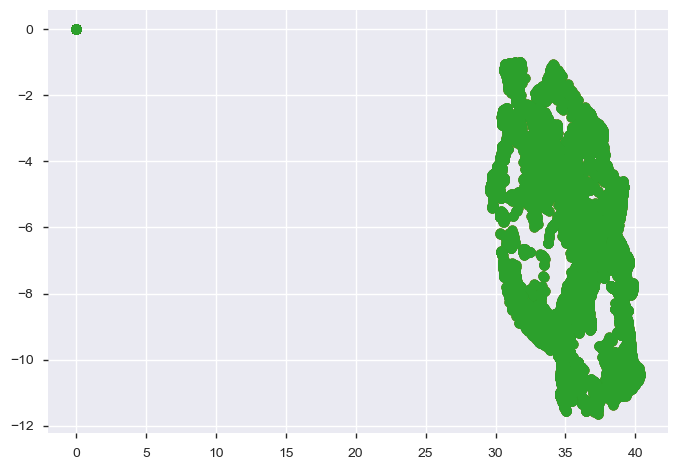

In [ ]:
# null island!
# bunch of data coordinates at 0,0
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(train['longitude'], train['latitude'])
plt.show()

In [ ]:
train[train['latitude'] == 0]

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,population,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
train[train['longitude'] == 0]

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,population,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
18191,0.0,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,17,1,0,True,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59340,0.0,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,17,1,0,True,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
9535,0.0,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,17,1,0,NaN,...,unknown,unknown,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
35395,0.0,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,17,1,0,NaN,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
56429,0.0,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,17,1,0,True,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30428,0.0,0,0.0,-2.000000e-08,Lake Victoria,Shinyanga,17,1,0,NaN,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
60259,0.0,0,0.0,-2.000000e-08,Lake Victoria,Mwanza,19,6,0,True,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
55213,0.0,0,0.0,-2.000000e-08,Lake Victoria,Mwanza,19,2,0,True,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


# II. Split Data

## Split TV from FM

In [ ]:
target =
y = train[target]
X = train.drop(columns=target)

## Training-Validation Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# III. Establish Baseline

- Is this a *regression* or a *classification* problem?

In [ ]:
print('baseline accuracy:',)

# IV. Build Model(s)

**First Model:** Logistic Regression

In [ ]:
model_lr = make_pipeline()

model_lr.fit(X_train, y_train)

**Second Model:** Decision Tree Classifier

In [ ]:
model_dt = make_pipeline()

model_dt.fit(X_train, y_train)

**Interlude: How does a tree model work?**

# V. Check Metrics

In [ ]:
print('model_lr accuracy score for training',)
print('model_lr accuracy score for val', )

In [ ]:

print('model_dt accuracy score for training', )
print('model_dt accuracy score for val', )

# VI. Tune Model

In [ ]:
depths = range(5, 20, 2)
list(depths)

In [ ]:
# very similar steps to how we tuned alpha for ridge regression

# train_acc = []
# val_acc = []


#   tree_model.fit(X_train, y_train)
#   train_acc.append(tree_model.score(X_train, y_train))
#   val_acc.append(tree_model.score(X_val, y_val))

In [ ]:

# plt.plot(depths, train_acc, color='blue', label='training')
# plt.plot(depths, val_acc, color='orange', label='validation')
# plt.xlabel('max_depth')
# plt.ylabel('accuracy')
# plt.title('Validation Curves') # These plots are called VALIDATION CURVES!
# plt.legend()
# plt.show()

# VII. Communicate Results


### Gini importance

In [ ]:
features =
gini_importances =
pd.Series(data=gini_importances, index=features).sort_values(key=abs).tail(10).plot(kind='barh')
plt.ylabel('features')
plt.xlabel('gini importance');

# VIII. Kaggle Submission

In [ ]:
predictions = pd.DataFrame(data=model_lr.predict(X_test), index=X_test.index)

In [ ]:
predictions.columns = ['status_group']

In [ ]:
predictions

In [ ]:
# generate CSV
predictions.to_csv('new_submission.csv')